<a href="https://colab.research.google.com/github/Itisbeen/Data_Analysis_project/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas as pd
# import numpy as np

# bit_url = 'https://raw.githubusercontent.com/Itisbeen/Data_Analysis_project/refs/heads/main/csv_file/BTC_USD%20%EA%B3%BC%EA%B1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0.csv'
# nasdaq_url = 'https://raw.githubusercontent.com/Itisbeen/Data_Analysis_project/refs/heads/main/csv_file/%EB%82%98%EC%8A%A4%EB%8B%A5%20100%20%EA%B3%BC%EA%B1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0.csv'
# oil_url = 'https://raw.githubusercontent.com/Itisbeen/Data_Analysis_project/refs/heads/main/csv_file/WTI%EC%9C%A0%20%EC%84%A0%EB%AC%BC%20%EA%B3%BC%EA%B1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0.csv'
# gold_url = 'https://raw.githubusercontent.com/Itisbeen/Data_Analysis_project/refs/heads/main/csv_file/%EA%B8%88%20%EC%84%A0%EB%AC%BC%20%EA%B3%BC%EA%B1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0.csv'


# df_bitcoin = pd.read_csv(bit_url)
# df_nasdaq = pd.read_csv(nasdaq_url)
# df_gold = pd.read_csv(gold_url)
# df_oil = pd.read_csv(oil_url)

# investing 을 이용한 csv 직접 다운 형식 -> 사용하지 않을 예정

In [2]:
!pip install yfinance --upgrade # 코드 실행전 yfinance 오류를 막기 위한 업데이트

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [3]:
# 짬통 코드
# btc_data.to_csv('btc_data.csv')
# gold_data.to_csv('gold_data.csv')
# oil_data.to_csv('oil_data.csv')
# nasdaq_data.to_csv('nasdaq_data.csv')

In [4]:
import yfinance as yf # yahoo finance module 을 사용한 방식

tickers = ['BTC-USD', 'GC=F', 'CL=F', '^IXIC'] # ['비트코인', '금', '원유', '나스닥']
# https://finance.yahoo.com/quote/BTC-USD/
data = yf.download(  # 기본적으로 yfinance 는 pandas dataframe 으로 반환
    tickers,
    start='2014-09-17', # yahoo finance 의 btc historical data 는 14년부터 존재
    end='2025-05-04',
    interval='1d',       # 일간
    auto_adjust=True,    # 배당/스플릿 보정
    actions=False,
    group_by='ticker'    # ticker 밑에 가격 생성
)

data['BTC-USD'].tail() # 자산 밑에 시가, 고가, 저가, 종가, 거래량 순

[*********************100%***********************]  4 of 4 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-04-29,94981.859375,95485.414062,93796.632812,94284.789062,25806129921
2025-04-30,94286.468750,95249.320312,92979.640625,94207.312500,28344679831
2025-05-01,94212.859375,97437.960938,94153.632812,96492.335938,32875889623
2025-05-02,96494.968750,97905.898438,96375.945312,96910.070312,26421924677
2025-05-03,96904.632812,96943.882812,95821.289062,95891.796875,15775154889


In [5]:
gold_data = data['GC=F']
oil_data = data['CL=F']
nasdaq_data = data['^IXIC']
btc_data = data['BTC-USD']

print(gold_data.shape)
print(oil_data.shape)
print(nasdaq_data.shape)
print(btc_data.shape)

(3882, 5)
(3882, 5)
(3882, 5)
(3882, 5)


In [6]:
print(btc_data.index[0], oil_data.index[0], gold_data.index[0], nasdaq_data.index[0]) # UTC 00:00 기준 데이터
print(btc_data.index[-1], oil_data.index[-1], gold_data.index[-1], nasdaq_data.index[-1]) # UTC 00:00 기준 데이터

2014-09-17 00:00:00 2014-09-17 00:00:00 2014-09-17 00:00:00 2014-09-17 00:00:00
2025-05-03 00:00:00 2025-05-03 00:00:00 2025-05-03 00:00:00 2025-05-03 00:00:00


In [7]:
print(btc_data['Close'].isna().sum()) # 24시간 거래이므로 결측치가 없음
print(gold_data['Close'].isna().sum()) # 주말 및 공휴일의 결측치가 존재
print(oil_data['Close'].isna().sum()) # 주말 및 공휴일의 결측치가 존재
print(nasdaq_data['Close'].isna().sum()) # 주말 및 공휴일의 결측치가 존재

0
1211
1210
1209


In [8]:
import pandas as pd
import numpy as np

# 자산 내부 Close columns 만 loc
close_data = data.loc[:, (slice(None), 'Close')]
# 컬럼을 단순화 (티커 이름만 컬럼으로 사용)
close_data.columns = close_data.columns.get_level_values(0)

close_data.shape
close_data.tail()

Ticker,^IXIC,CL=F,BTC-USD,GC=F
Date,,,,
2025-04-29,17461.320312,60.419998,94284.789062,3318.800049
2025-04-30,17446.339844,58.209999,94207.312500,3305.000000
2025-05-01,17710.740234,59.240002,96492.335938,3210.000000
2025-05-02,17977.730469,58.290001,96910.070312,3231.899902
2025-05-03,NaN,NaN,95891.796875,NaN


In [9]:
close_data = close_data.dropna(how = 'any') # row 에 nan 이 하나라도 있으면 제거

In [10]:
close_data.shape # 2670 개의 데이터

(2670, 4)

In [11]:
btc_data = close_data['BTC-USD']
oil_data = close_data['CL=F']
gold_data = close_data['GC=F']
nasdaq_data = close_data['^IXIC']

In [12]:
print(btc_data.shape)
print(oil_data.shape)
print(gold_data.shape)
print(nasdaq_data.shape)

(2670,)
(2670,)
(2670,)
(2670,)


In [13]:
from scipy.stats import shapiro # 정규성 검정을 위한 shaprio module

btc_shapiro_test = shapiro(btc_data) # p-value < 0.05 -> 매우 작은 수 : 정규성을 띄지 않음 -> Pearson 사용불가
oil_shapiro_test = shapiro(oil_data) # 피어슨 상관계수는 이론적으로 두 변수 모두 정규분포를 따라야함
gold_shapiro_test = shapiro(gold_data)
nasdaq_shapiro_test = shapiro(nasdaq_data)

# shapiro test 의 경우 데이터가 5000 개 이하여야함

print(btc_shapiro_test)
print(oil_shapiro_test) # p-value < 0.05
print(gold_shapiro_test) # p-value < 0.05
print(nasdaq_shapiro_test) # p-value < 0.05

ShapiroResult(statistic=np.float64(0.8138119299634807), pvalue=np.float64(3.0887970894164657e-48))
ShapiroResult(statistic=np.float64(0.9860518334168482), pvalue=np.float64(1.5626361240874972e-15))
ShapiroResult(statistic=np.float64(0.882888906805781), pvalue=np.float64(5.572198992236439e-41))
ShapiroResult(statistic=np.float64(0.9223522720793953), pvalue=np.float64(4.621969217595611e-35))


In [14]:
# from scipy.stats import spearmanr # spearman 상관계수 사용

# gold_corr, gold_p = spearmanr(btc_data, gold_data)
# oil_corr, oil_p = spearmanr(btc_data, oil_data)
# nasdaq_corr, nasdaq_p = spearmanr(btc_data, nasdaq_data)

# # 결과 표 만들기
# corr_table = pd.DataFrame({
#     'Asset': ['Gold', 'Oil', 'Nasdaq'],
#     'Spearman Correlation': [gold_corr, oil_corr, nasdaq_corr],
#     'P-value': [gold_p, oil_p, nasdaq_p]
# })

# # 보기 좋게 출력
# print(corr_table.to_string(index=False, float_format='%.4g'))
# 스피어맨 상관계수는 순위기반 즉, 추세가 있다면 높게 나올 확률이 높음

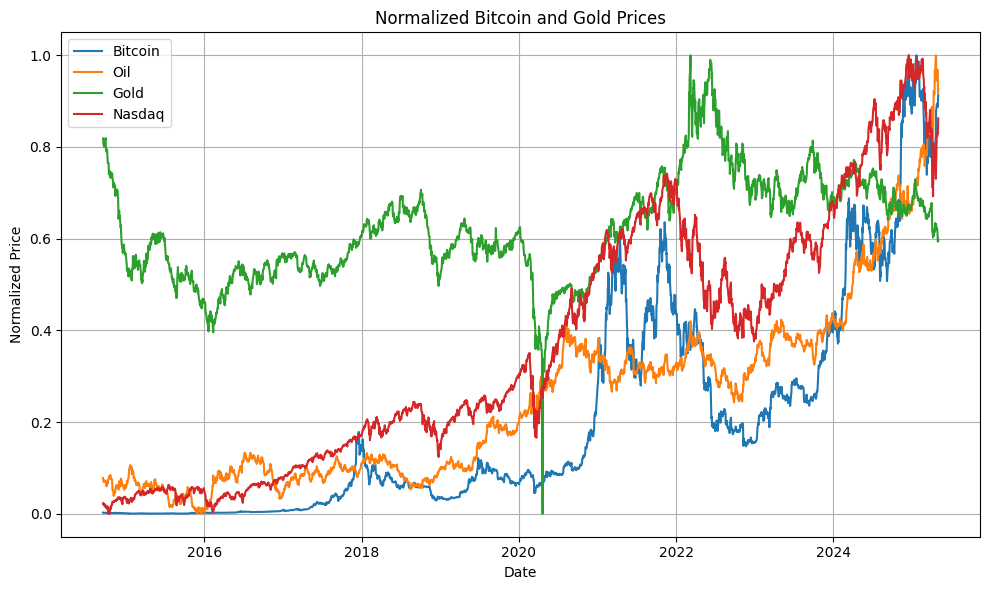

In [22]:
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Bitcoin': btc_data,
    'Gold': gold_data,
    'Oil' : oil_data,
    'Nasdaq' : nasdaq_data
})

# Min-Max 정규화
df_norm = (df - df.min()) / (df.max() - df.min())

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_norm.index, df_norm['Bitcoin'], label='Bitcoin')
plt.plot(df_norm.index, df_norm['Gold'], label='Oil')
plt.plot(df_norm.index, df_norm['Oil'], label='Gold')
plt.plot(df_norm.index, df_norm['Nasdaq'], label='Nasdaq')
plt.title('Normalized Bitcoin and Gold Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 해석 : 정상성(Stationarity) 를 띄지 않고 추세를 가지고 있음
# 한 그래프에서 보기 위해 정규화를 사용함

In [16]:
btc_data_log = np.log(btc_data) # 데이터를 로그변환
gold_data_log = np.log(gold_data)
oil_data_log = np.log(oil_data)
nasdaq_data_log = np.log(nasdaq_data)

print(btc_data_log.shape)
print(gold_data_log.shape)
print(oil_data_log.shape)
print(nasdaq_data_log.shape)
btc_data_log.head()

(2670,)
(2670,)
(2670,)
(2670,)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,BTC-USD
Date,
2014-09-17,6.125414
2014-09-18,6.050771
2014-09-19,5.978369
2014-09-22,5.996830
2014-09-23,6.077163


In [23]:
btc_data_log_diff = btc_data_log.diff() # 차분 ln(P) = ln(P) - ln(P-1)
gold_data_log_diff = gold_data_log.diff()
oil_data_log_diff = oil_data_log.diff()
nasdaq_data_log_diff = nasdaq_data_log.diff()

print(btc_data_log_diff.shape)
print(gold_data_log_diff.shape)
print(oil_data_log_diff.shape)
print(nasdaq_data_log_diff.shape)

print(oil_data_log_diff[oil_data_log_diff.isna()]) # 20년 4월 20일 원유 가격 음수 -> log 변환 0 -> 차분 이후 nan

btc_data_log_diff.head() # 차분 이후 첫번째 값은 항상 Nan
# 코드 동작마다 nan 갯수 증가하는 것 방지 위해
# 전부 다른 변수 사용

(2670,)
(2670,)
(2670,)
(2670,)
Date
2014-09-17   NaN
2020-04-20   NaN
2020-04-21   NaN
Name: CL=F, dtype: float64


,BTC-USD
Date,
2014-09-17,NaN
2014-09-18,-0.074643
2014-09-19,-0.072402
2014-09-22,0.018461
2014-09-23,0.080333


In [24]:
df = pd.DataFrame({
    'Bitcoin': btc_data_log_diff,
    'Gold': gold_data_log_diff,
    'Oil' : oil_data_log_diff,
    'Nasdaq' : nasdaq_data_log_diff
})

df = df.dropna(how = 'any')

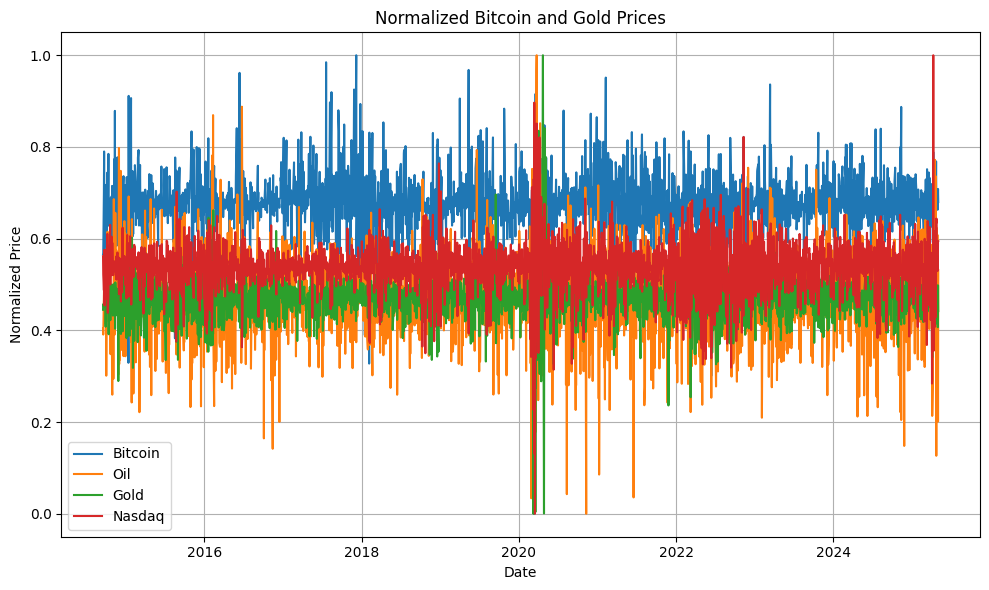

In [25]:
# Min-Max 정규화
df_norm = (df - df.min()) / (df.max() - df.min())

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_norm.index, df_norm['Bitcoin'], label='Bitcoin')
plt.plot(df_norm.index, df_norm['Gold'], label='Oil')
plt.plot(df_norm.index, df_norm['Oil'], label='Gold')
plt.plot(df_norm.index, df_norm['Nasdaq'], label='Nasdaq')
plt.title('Normalized Bitcoin and Gold Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# 해석 : 로그 차분 계산을 통해 자료에서 추세가 사라지고, Stationarity 를 띄게 함

In [26]:
btc_shapiro_test = shapiro(btc_data) # p-value < 0.05 -> 매우 작은 수 : 정규성을 띄지 않음 -> Pearson 사용불가
oil_shapiro_test = shapiro(oil_data) # 피어슨 상관계수는 이론적으로 두 변수 모두 정규분포를 따라야함
gold_shapiro_test = shapiro(gold_data)
nasdaq_shapiro_test = shapiro(nasdaq_data)

# shapiro test 의 경우 데이터가 5000 개 이하여야함

print(btc_shapiro_test)
print(oil_shapiro_test) # p-value < 0.05
print(gold_shapiro_test) # p-value < 0.05
print(nasdaq_shapiro_test) # p-value < 0.05
# Stationarity 가 정규분포를 만들어주지는 않는다.

ShapiroResult(statistic=np.float64(0.8138119299634807), pvalue=np.float64(3.0887970894164657e-48))
ShapiroResult(statistic=np.float64(0.9860518334168482), pvalue=np.float64(1.5626361240874972e-15))
ShapiroResult(statistic=np.float64(0.882888906805781), pvalue=np.float64(5.572198992236439e-41))
ShapiroResult(statistic=np.float64(0.9223522720793953), pvalue=np.float64(4.621969217595611e-35))


In [30]:
from scipy.stats import pearsonr # 정규성을 띄지 않더라도 데이터가 충분히 많고 정상성을 띄기에 피어슨 상관계수 사용

gold_corr, gold_p = pearsonr(df['Bitcoin'], df['Gold'])
oil_corr, oil_p = pearsonr(df['Bitcoin'], df['Oil'])
nasdaq_corr, nasdaq_p = pearsonr(df['Bitcoin'], df['Nasdaq'])

print(f"피어슨 상관계수: {gold_corr:.4f}")
print(f"p-value: {gold_p:.4f}")
print(f"피어슨 상관계수: {oil_corr:.4f}")
print(f"p-value: {oil_p:.4f}")
print(f"피어슨 상관계수: {nasdaq_corr:.4f}")
print(f"p-value: {nasdaq_p:.4f}")

피어슨 상관계수: 0.0830
p-value: 0.0000
피어슨 상관계수: 0.0512
p-value: 0.0081
피어슨 상관계수: 0.2432
p-value: 0.0000


**References**

1. 이은주. "비트코인과 주요 자산 간 상관관계 분석: 금, 주식, 달러와의 비교." 국내석사학위논문 고려대학교 정책대학원, 2025. 서울

2. Bitcoin: Medium of exchange or speculative assets?